<a href="https://colab.research.google.com/github/yangswei112/fsb-project2/blob/main/finalproject_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bussiness Understanding

- Understands the business process
- Define and frame the business problem
- Define the business objective
- Define data mining solutions and goals
- Agree on success criteria

# Data Understanding

- Collect initial data
- Describe data
- Verify data quality

### Read Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_churn = pd.read_excel('ecommerce.xlsx')
df_churn

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
num = ['CustomerID','Churn','Tenure','CityTier','WarehouseToHome','HourSpendOnApp',
        'NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress', 'Complain',
        'OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder',
        'CashbackAmount']
cat = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']

In [ ]:
df_churn.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
df_churn[cat].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


# Exploratory Data Analysis (Part 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

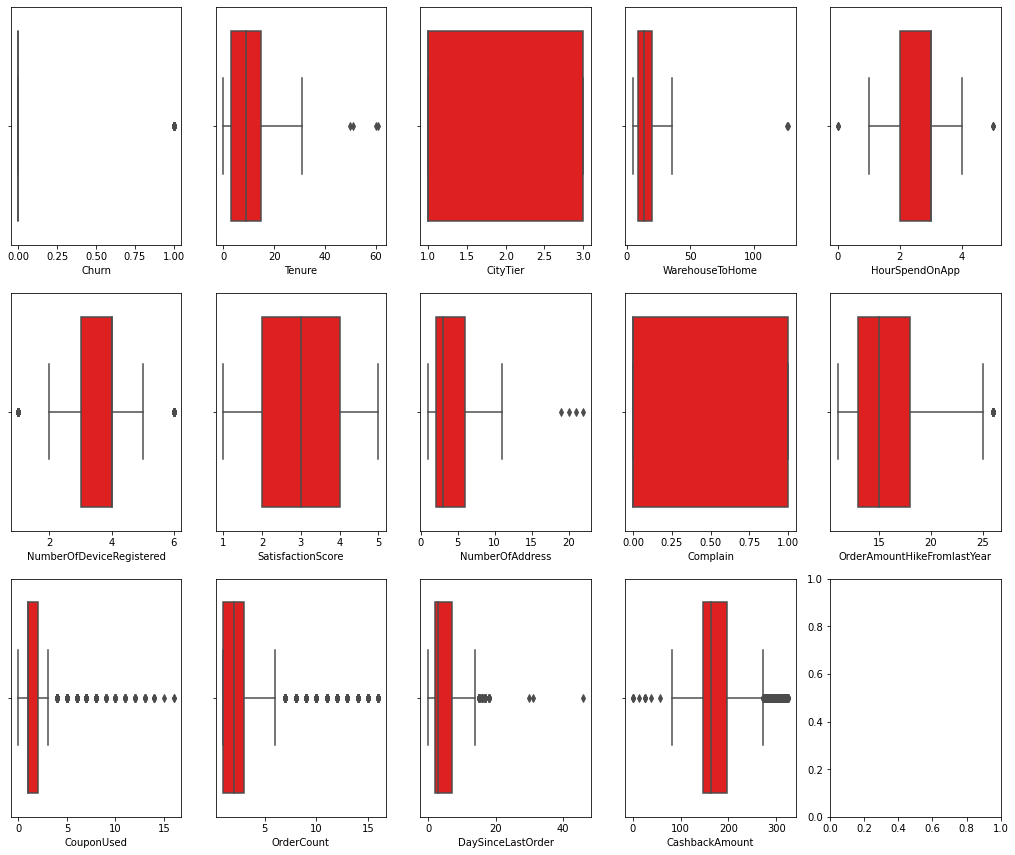

In [ ]:
# univariate analysis
# boxplot
num = ['CustomerID','Churn','Tenure','CityTier','WarehouseToHome','HourSpendOnApp',
        'NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress', 'Complain',
        'OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder',
        'CashbackAmount']

fig, axs = plt.subplots(ncols = 5, nrows = 3, figsize = (10, 10))
plt.subplots_adjust(right = 1.5, top = 1.25)

for i in range(1, len(num)):
  plt.subplot(3,5,i)
  sns.boxplot(df_churn[num[i]], color="red", orient="h")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

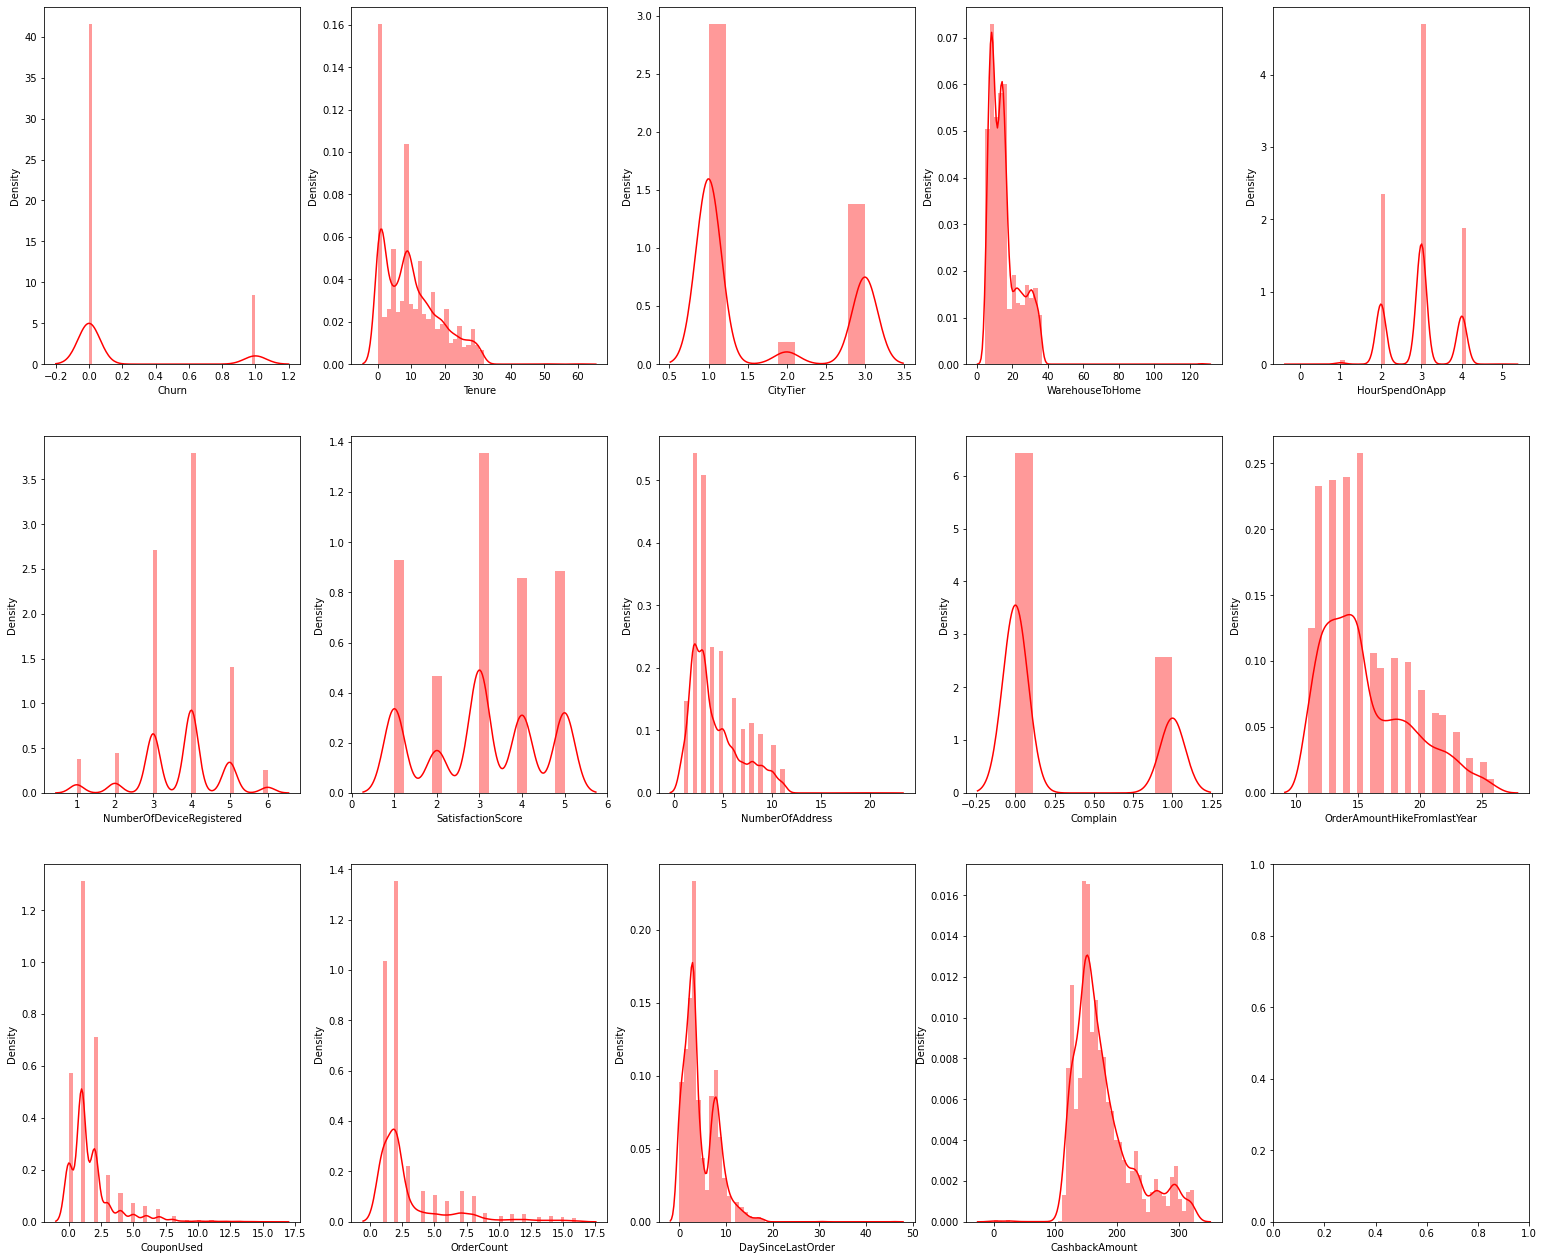

In [ ]:
# dist plot
num = ['CustomerID','Churn','Tenure','CityTier','WarehouseToHome','HourSpendOnApp',
        'NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress', 'Complain',
        'OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder',
        'CashbackAmount']

fig, axs = plt.subplots(ncols = 5, nrows = 3, figsize = (15, 15))
plt.subplots_adjust(right = 1.5, top = 1.25)

for i in range(1,len(num)):
  plt.subplot(3,5,i)
  sns.distplot(df_churn[num[i]], color="red")
plt.show()

# Data Preprocessing

Steps
1. Handling Missing Values
2. Handling Inconsistent Data
3. Handling Duplicated Values
4. Handling Outlier
5. Feature Engineering
6. Imbalance Target Variable

### 1. Handling Missing Values

Penanganan missing values dilakukan dengan mengisi nilai tersebut dengan median.

In [ ]:
# cek
df_churn.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
# handling with median
df_churn['Tenure'].fillna(df_churn['Tenure'].median(), inplace=True)
df_churn['WarehouseToHome'].fillna(df_churn['WarehouseToHome'].median(), inplace=True)
df_churn['HourSpendOnApp'].fillna(df_churn['HourSpendOnApp'].median(), inplace=True)
df_churn['OrderAmountHikeFromlastYear'].fillna(df_churn['OrderAmountHikeFromlastYear'].median(), inplace=True)
df_churn['CouponUsed'].fillna(df_churn['CouponUsed'].median(), inplace=True)
df_churn['OrderCount'].fillna(df_churn['OrderCount'].median(), inplace=True)
df_churn['DaySinceLastOrder'].fillna(df_churn['DaySinceLastOrder'].median(), inplace=True)
df_churn.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### 2. Handling Inconsistent Data

In [ ]:
cat = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain']

for ftr in cat:
    print(df_churn[ftr].value_counts(),'\n')

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64 

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64 

Male      3384
Female    2246
Name: Gender, dtype: int64 

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64 

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64 

0    4026
1    1604
Name: Complain, dtype: int64 



In [ ]:
df_churn['PreferredLoginDevice'] = df_churn['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})
df_churn['PreferredPaymentMode'] = df_churn['PreferredPaymentMode'].replace({'Credit Card':'CC'})
df_churn['PreferredPaymentMode'] = df_churn['PreferredPaymentMode'].replace({'Cash on Delivery':'COD'})
df_churn['PreferedOrderCat'] = df_churn['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

In [ ]:
cat = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain']

for ftr in cat:
    print(df_churn[ftr].value_counts(),'\n')

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64 

Debit Card    2314
CC            1774
E wallet       614
COD            514
UPI            414
Name: PreferredPaymentMode, dtype: int64 

Male      3384
Female    2246
Name: Gender, dtype: int64 

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64 

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64 

0    4026
1    1604
Name: Complain, dtype: int64 



### 3. Handling Duplicated Values

In [ ]:
df_churn.duplicated().sum()

0

###4. Handling Outlier

In [ ]:
# numerical value
num = df_churn[['CustomerID','Churn','Tenure','CityTier','WarehouseToHome','HourSpendOnApp',
            'NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
            'OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder',
            'CashbackAmount']]
num.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
# using zscore
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_churn)}')

filtered_entries = np.array([True] * len(df_churn))
for col in num:
    zscore = abs(stats.zscore(df_churn[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
churn_filtered = df_churn[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(churn_filtered)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5350


###5. Feature Engineering

In [ ]:
churn_filtered.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,CC,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
# feature selection
churn_filtered.drop(columns = ['CustomerID','NumberOfAddress'], inplace = True)
churn_filtered

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Mobile Phone,1,12.0,CC,Male,3.0,3,Mobile Phone,5,Single,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,CC,Male,3.0,2,Laptop & Accessory,1,Married,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,CC,Male,3.0,5,Fashion,5,Married,0,16.0,1.0,2.0,3.0,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,CC,Male,4.0,5,Laptop & Accessory,4,Married,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
# feature encode
for cat in [['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']]:
    onehots = pd.get_dummies(churn_filtered[cat], prefix=cat)
    churn_filtered2 = churn_filtered.join(onehots)
churn_filtered2.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,...,1,0,0,0,1,0,0,0,0,1
1,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,...,0,1,0,0,0,1,0,0,0,1
2,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,...,0,1,0,0,0,1,0,0,0,1
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,...,0,1,0,0,1,0,0,0,0,1
4,1,0.0,Mobile Phone,1,12.0,CC,Male,3.0,3,Mobile Phone,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
churn_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5350 non-null   int64  
 1   Tenure                               5350 non-null   float64
 2   PreferredLoginDevice                 5350 non-null   object 
 3   CityTier                             5350 non-null   int64  
 4   WarehouseToHome                      5350 non-null   float64
 5   PreferredPaymentMode                 5350 non-null   object 
 6   Gender                               5350 non-null   object 
 7   HourSpendOnApp                       5350 non-null   float64
 8   NumberOfDeviceRegistered             5350 non-null   int64  
 9   PreferedOrderCat                     5350 non-null   object 
 10  SatisfactionScore                    5350 non-null   int64  
 11  MaritalStatus                 

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
x_churn = churn_filtered2.drop(columns = ['Churn','PreferredLoginDevice','PreferredPaymentMode',
                                          'Gender','PreferedOrderCat','MaritalStatus'], axis=1)
y_churn = churn_filtered2['Churn']

sc = StandardScaler()
x_churn2 = sc.fit_transform(x_churn)

In [ ]:
x_churn3 = pd.DataFrame(x_churn2, columns=x_churn.columns)
x_churn3.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-0.709736,1.474493,-1.183014,0.100132,-0.658056,-0.766279,1.578660,-1.304506,-0.369994,-0.747712,...,1.226655,-1.226655,-0.404412,-0.257219,1.294218,-0.789105,-0.203627,-0.420238,-1.057739,1.4515
1,-0.098328,-0.714335,-0.935037,0.100132,0.316639,-0.040944,1.578660,-0.185207,-1.078464,-0.747712,...,-0.815225,0.815225,-0.404412,-0.257219,-0.772667,1.267258,-0.203627,-0.420238,-1.057739,1.4515
2,-0.098328,-0.714335,1.792714,-1.324620,0.316639,-0.040944,1.578660,-0.465032,-1.078464,-0.747712,...,-0.815225,0.815225,-0.404412,-0.257219,-0.772667,1.267258,-0.203627,-0.420238,-1.057739,1.4515
3,-1.198863,1.474493,-0.067116,-1.324620,0.316639,1.409726,-0.633449,2.053390,-1.078464,-0.747712,...,-0.815225,0.815225,-0.404412,-0.257219,1.294218,-0.789105,-0.203627,-0.420238,-1.057739,1.4515
4,-1.198863,-0.714335,-0.439082,0.100132,-0.658056,1.409726,-0.633449,-1.304506,-0.369994,-0.747712,...,-0.815225,0.815225,-0.404412,-0.257219,-0.772667,1.267258,-0.203627,-0.420238,-1.057739,1.4515


###6. Imbalance Target Variable

In [ ]:
churn = churn_filtered2['Churn'].value_counts()[1]
not_churn = churn_filtered2['Churn'].value_counts()[0]
churn_per = churn / churn_filtered2.shape[0] * 100
not_churn_per = not_churn / churn_filtered2.shape[0] * 100

print('{} of {} customers churn and it is the {:.2f}% of the data set.'.format(churn, churn_filtered2.shape[0], churn_per))
print('{} of {} customers didnt churn and it is the {:.2f}% of the data set.'.format(not_churn, churn_filtered2.shape[0], not_churn_per))

912 of 5350 customers churn and it is the 17.05% of the data set.
4438 of 5350 customers didnt churn and it is the 82.95% of the data set.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


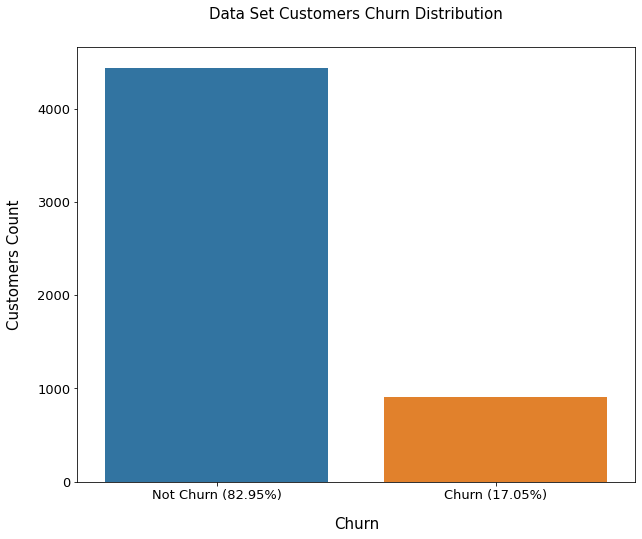

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(churn_filtered2['Churn'])

plt.xlabel('Churn', size = 15, labelpad = 15)
plt.ylabel('Customers Count', size = 15, labelpad = 15)
plt.xticks((0, 1), ['Not Churn ({0:.2f}%)'.format(not_churn_per), 'Churn ({0:.2f}%)'.format(churn_per)])
plt.tick_params(axis = 'x', labelsize = 13)
plt.tick_params(axis = 'y', labelsize = 13)

plt.title('Data Set Customers Churn Distribution', size = 15, y = 1.05)
plt.show()

In [ ]:
# Handling with SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x_churn3, y_churn)

In [ ]:
pd.Series(y_smote).value_counts()

1    4438
0    4438
Name: Churn, dtype: int64

# Exploratory Data Analysis (Part 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

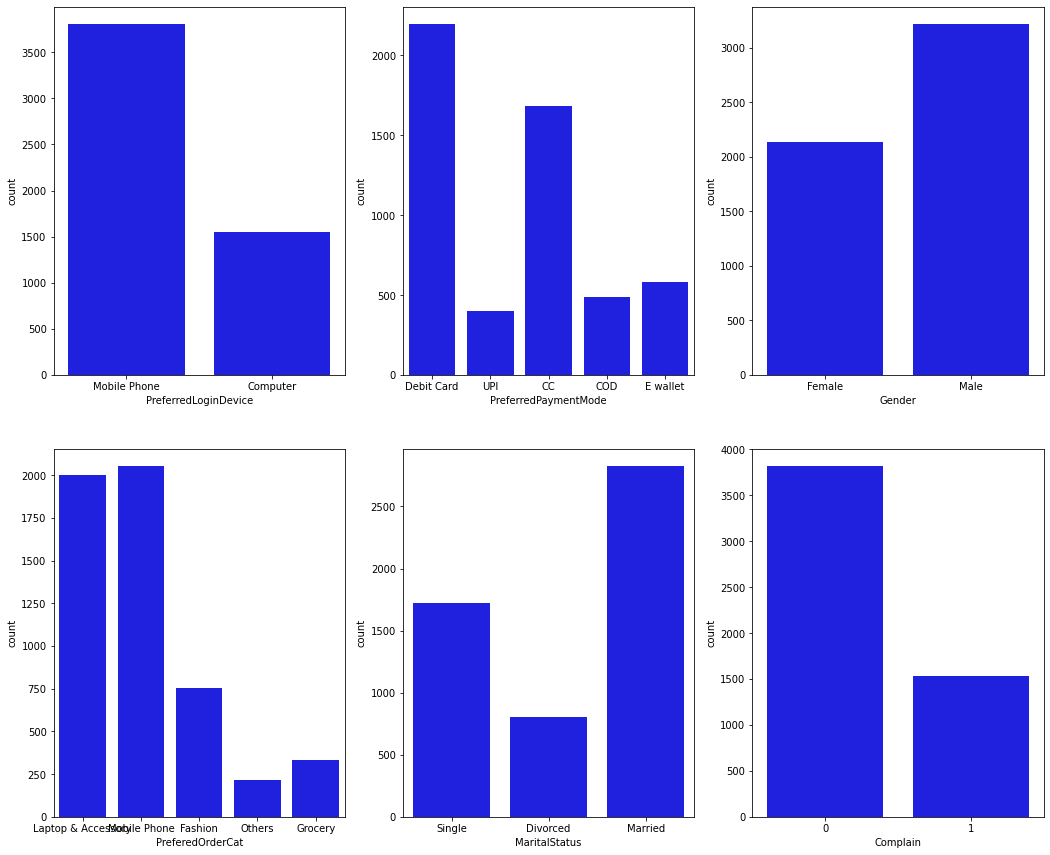

In [ ]:
# count plot : categorical (cat)
cat = ['','PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain']
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (10, 10))
plt.subplots_adjust(right = 1.5, top = 1.25)

for i in range(1, len(cat)):
  plt.subplot(2,3,i)
  sns.countplot(churn_filtered[cat[i]], color="blue", orient="v")
plt.show()

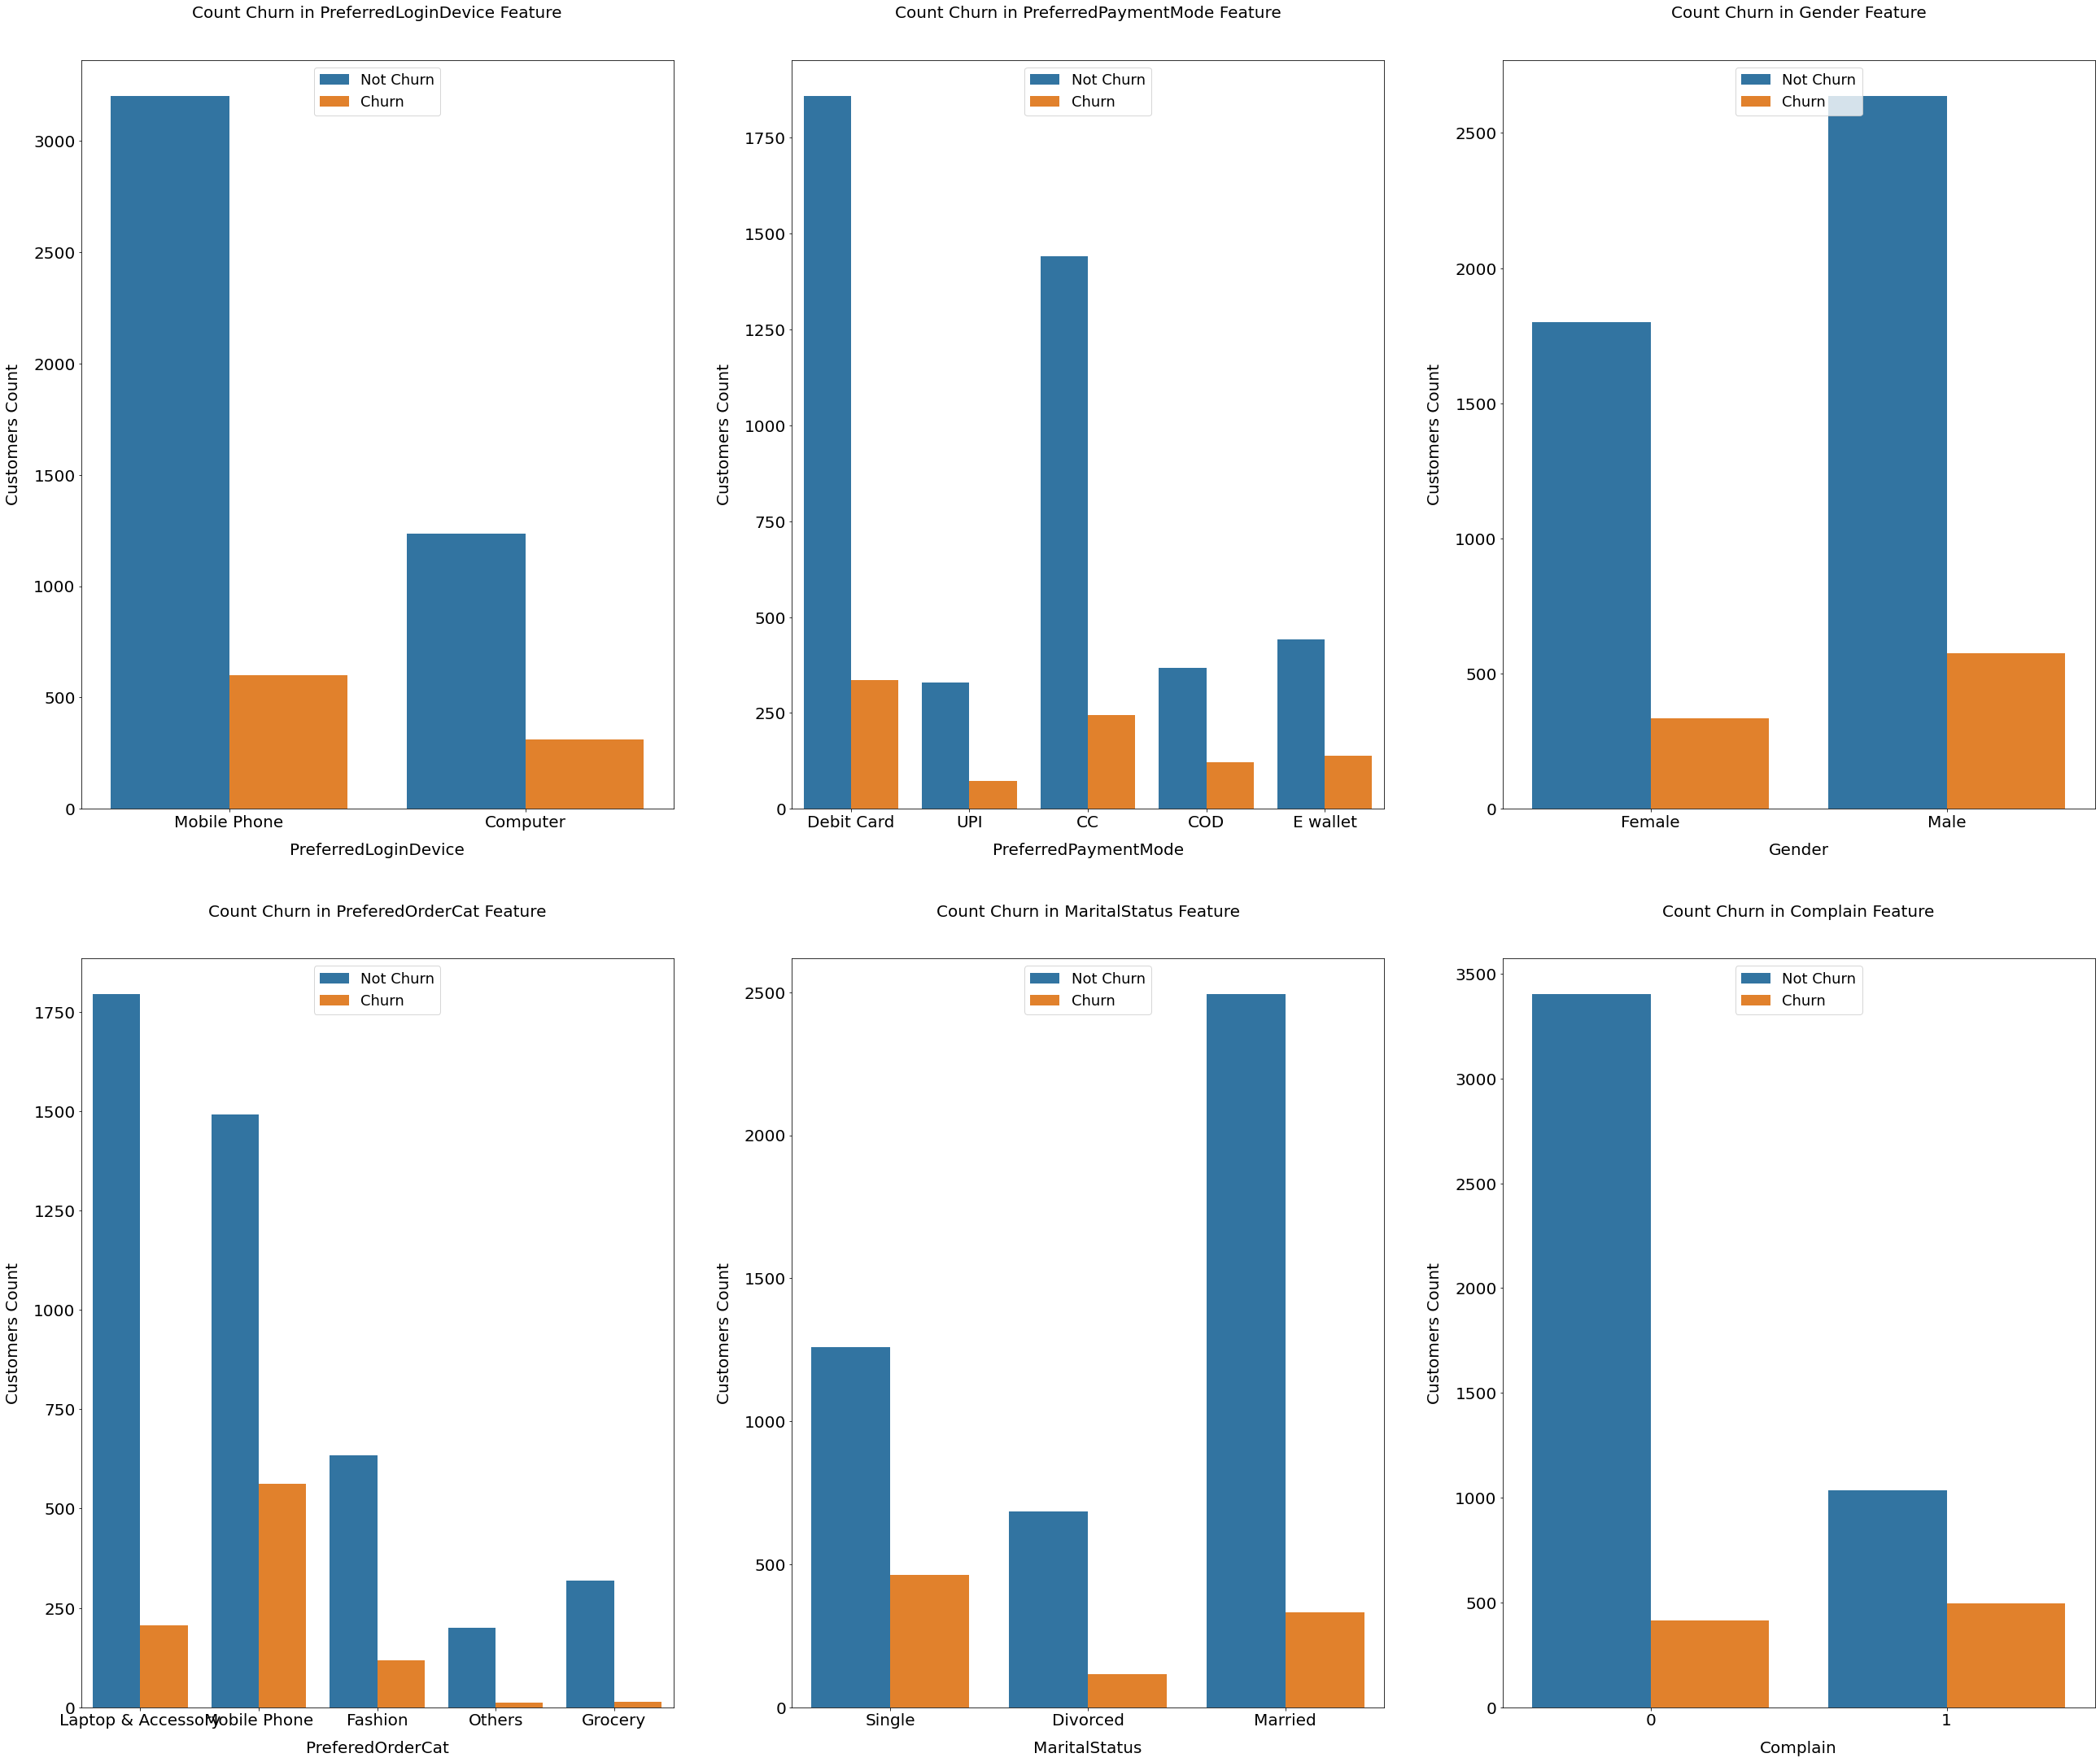

In [ ]:
cat = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain']

fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (25, 25))
plt.subplots_adjust(right = 1.5, top = 1.25)

for i, feature in enumerate(cat, 1):
  plt.subplot(2, 3, i)
  sns.countplot(x = feature, hue = 'Churn', data = churn_filtered)

  plt.xlabel('{}'.format(feature), size = 20, labelpad = 15)
  plt.ylabel('Customers Count', size = 20, labelpad = 15)
  plt.tick_params(axis = 'x', labelsize = 20)
  plt.tick_params(axis = 'y', labelsize = 20)

  plt.legend(['Not Churn', 'Churn'], loc = 'upper center', prop = {'size': 18})
  plt.title('Count Churn in {} Feature'.format(feature), size = 20, y = 1.05)

plt.show()

In [ ]:
df_smote = x_smote.merge(y_smote.to_frame(), left_index=True, right_index=True)
df_smote

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Churn
0,-0.709736,1.474493,-1.183014,0.100132,-0.658056,-0.766279,1.578660,-1.304506,-0.369994,-0.747712,...,-1.226655,-0.404412,-0.257219,1.294218,-0.789105,-0.203627,-0.420238,-1.057739,1.451500,1
1,-0.098328,-0.714335,-0.935037,0.100132,0.316639,-0.040944,1.578660,-0.185207,-1.078464,-0.747712,...,0.815225,-0.404412,-0.257219,-0.772667,1.267258,-0.203627,-0.420238,-1.057739,1.451500,1
2,-0.098328,-0.714335,1.792714,-1.324620,0.316639,-0.040944,1.578660,-0.465032,-1.078464,-0.747712,...,0.815225,-0.404412,-0.257219,-0.772667,1.267258,-0.203627,-0.420238,-1.057739,1.451500,1
3,-1.198863,1.474493,-0.067116,-1.324620,0.316639,1.409726,-0.633449,2.053390,-1.078464,-0.747712,...,0.815225,-0.404412,-0.257219,1.294218,-0.789105,-0.203627,-0.420238,-1.057739,1.451500,1
4,-1.198863,-0.714335,-0.439082,0.100132,-0.658056,1.409726,-0.633449,-1.304506,-0.369994,-0.747712,...,0.815225,-0.404412,-0.257219,-0.772667,1.267258,-0.203627,-0.420238,-1.057739,1.451500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,-1.174257,-0.714335,0.205810,0.386818,1.487461,0.684391,-0.633449,-0.128902,-0.227437,-0.651187,...,-1.226655,-0.404412,-0.257219,1.294218,-0.789105,-0.203627,-0.420238,0.945413,-0.688942,1
8872,-1.189923,1.474493,0.437903,0.204290,0.387895,1.409726,1.578660,-0.724400,-0.266407,-0.232938,...,0.815225,-0.404412,-0.257219,1.294218,-0.789105,-0.203627,-0.420238,0.945413,-0.688942,1
8873,-0.544519,-0.714335,-0.309820,0.100132,-1.591292,1.409726,1.578660,1.493741,-0.709161,-0.497657,...,0.815225,-0.404412,-0.257219,-0.772667,1.267258,-0.203627,-0.420238,0.945413,-0.688942,1
8874,-1.076581,1.474493,0.924793,1.524884,0.316639,1.409726,1.578660,1.493741,0.010365,-0.268007,...,-1.226655,2.472724,-0.257219,-0.772667,-0.789105,-0.203627,-0.420238,-1.057739,1.451500,1


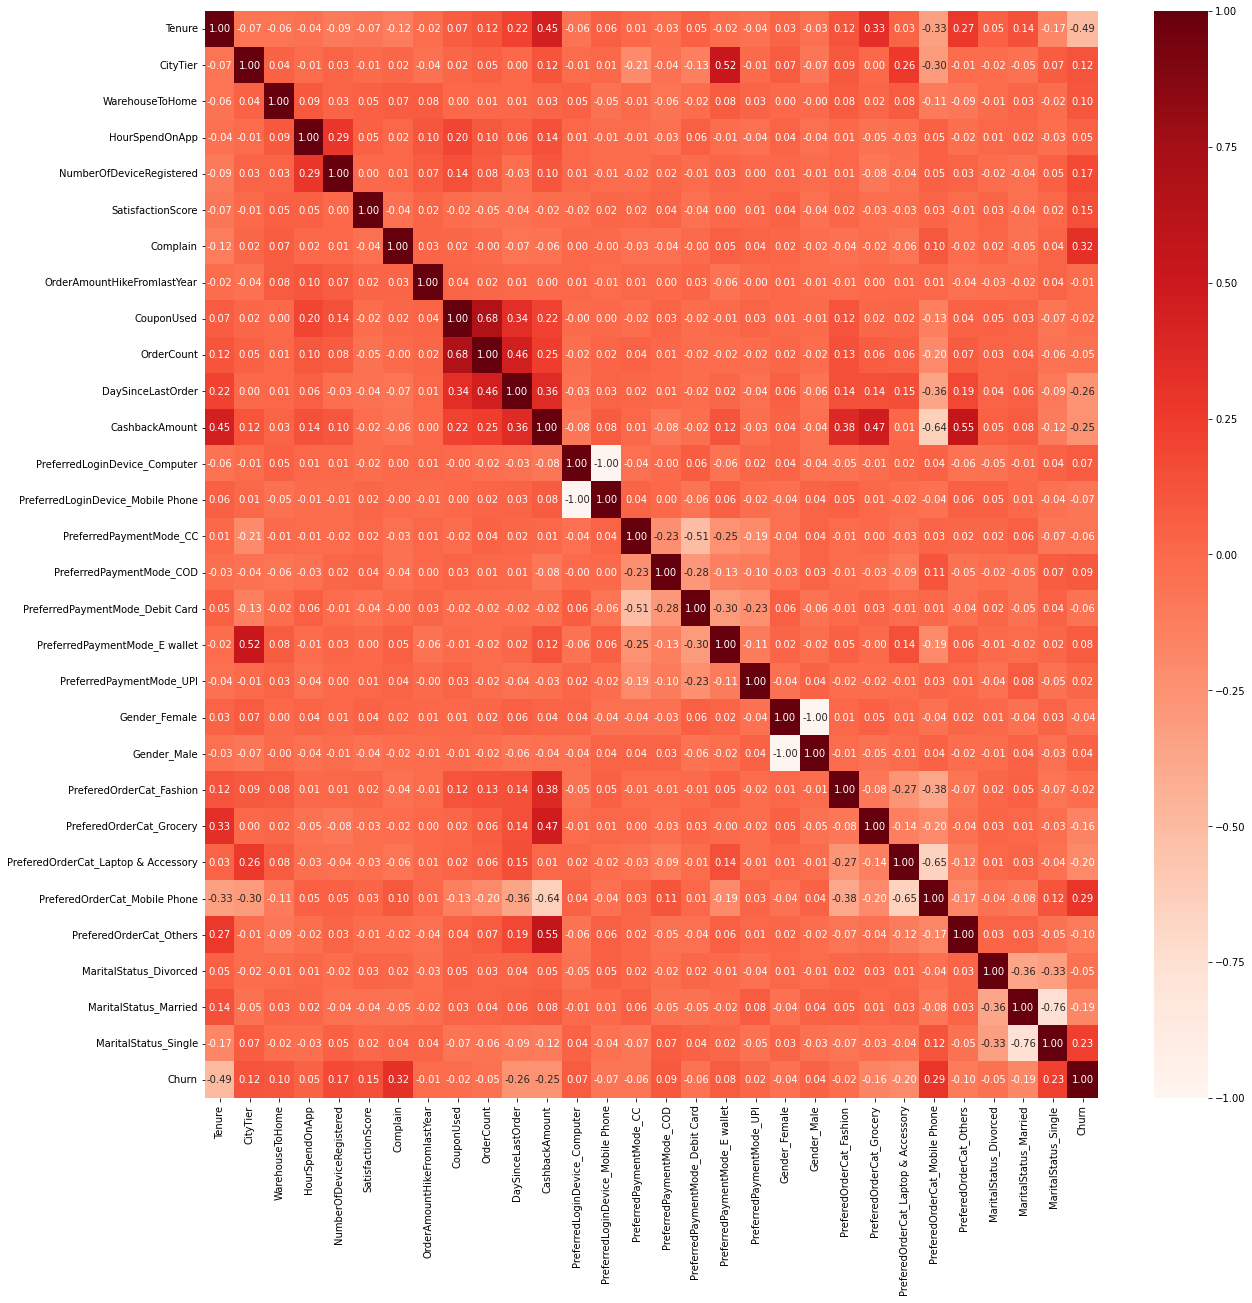

In [ ]:
# corelation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_smote.corr(), cmap="Reds", annot=True, fmt=".2f")

# Modelling

### 1. Split Data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=12)

### 2. Logistic Regression

In [ ]:
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from  sklearn.metrics import roc_curve, auc

In [ ]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x_smote.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(x_train, y_train)

lr_pred = model_lr.predict(x_test)

eval_classification(model_lr,lr_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.8164
Precision (Test Set): 0.8202
Recall (Test Set): 0.8184
F1-Score (Test Set): 0.8193
AUC: 0.82


In [ ]:
# Cek overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_lr.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model_lr.score(x_test, y_test)))

Training set score: 0.8165
Test set score: 0.8164


### 3. Ensemble Learning

In [ ]:
# Bagging (random forest)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
eval_classification(rf, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.9865
Precision (Test Set): 0.9878
Recall (Test Set): 0.9856
F1-Score (Test Set): 0.9867
AUC: 0.99


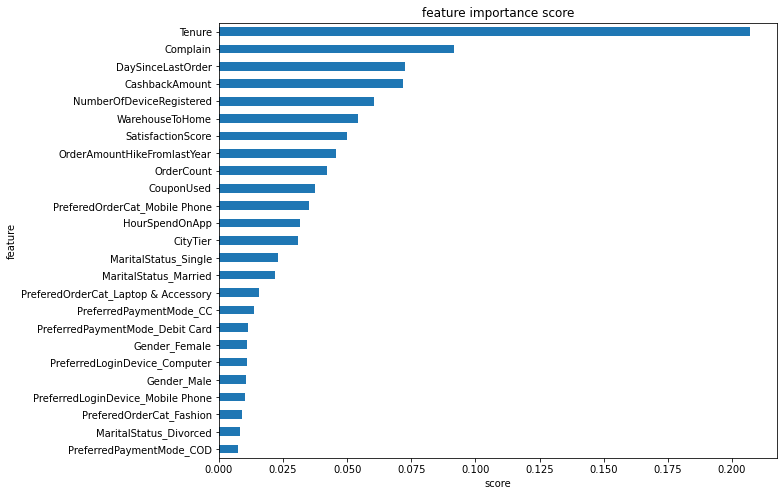

In [ ]:
show_feature_importance(rf)

In [ ]:
# Cek overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(rf.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9865


In [ ]:
# Boosting (XGBoost)

from xgboost import XGBClassifier
xg = XGBClassifier(random_state=50)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
eval_classification(xg, y_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.9161
Precision (Test Set): 0.9363
Recall (Test Set): 0.8959
F1-Score (Test Set): 0.9157
AUC: 0.92


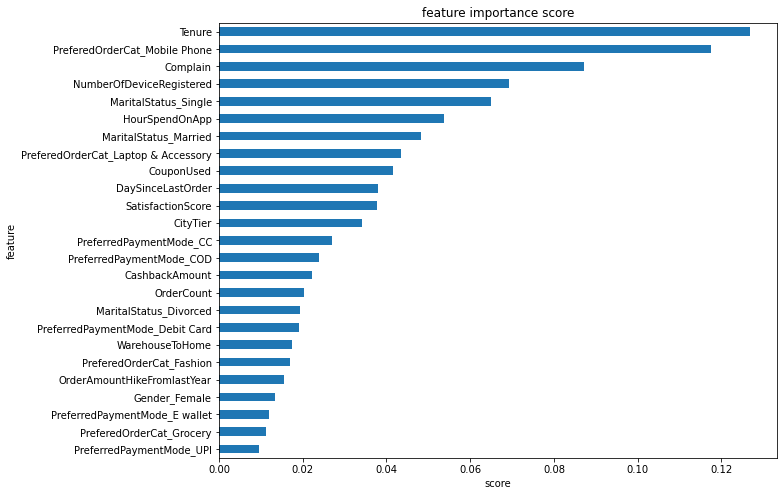

In [ ]:
show_feature_importance(xg)

In [ ]:
# Cek overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(xg.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(xg.score(x_test, y_test)))

Training set score: 0.9275
Test set score: 0.9161


## Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 5)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

In [ ]:
# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(x_smote, y_smote)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 35, 60, 85, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 7, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000],
                                        'n_jobs': [-1]},
                   random_state=42, scoring='recall')

In [ ]:
# Predict & Evaluation
y_pred = rf_tuned.predict(x_test) #Check performa dari model
eval_classification(rf_tuned, y_pred, x_smote, y_smote, x_test, y_test)

Accuracy (Test Set): 1.0000
Precision (Test Set): 1.0000
Recall (Test Set): 1.0000
F1-Score (Test Set): 1.0000
AUC: 1.00


## Hypothesis Testing

In [ ]:
dfchurn = churn_filtered2.loc[churn_filtered2['Churn'] == 1]
dfnotchurn = churn_filtered2.loc[churn_filtered2['Churn'] == 0]

In [ ]:
tenurechurn_mean = dfchurn['Tenure'].mean()
print(tenurechurn_mean)
tenurenotchurn_mean = dfnotchurn['Tenure'].mean()
print(tenurenotchurn_mean)

3.691885964912281
11.0601622352411


statement : apakah rata-rata tenure not churn > tenure churn?

H0 : rata-rata tenure not churn <= tenure not churn

H1 : rata-rata tenure not churn > tenure churn

In [ ]:
import scipy.stats as st

In [ ]:
uji_t = st.ttest_ind(a=dfchurn['Tenure'], b=dfnotchurn['Tenure'])
p_value = uji_t.pvalue
print("p_value:", p_value)

p_value: 7.953120970974895e-144


In [ ]:
if p_value >= 0.05:
  print("terima H0, rata-rata tenure not churn <= tenure not churn")
else:
  print("tolak HO, rata-rata tenure not churn > tenure churn")

tolak HO, rata-rata tenure not churn > tenure churn
